**Develop a predictive model to accurately forecast hourly traffic volumes at different road junctions based on historical traffic data**




IMPORT ESSENTIAL LIBRARIES


In [ ]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings("ignore")

IMPORT DATA

In [ ]:
# Load the traffic dataset
df1 = pd.read_csv('/content/Dataset_Uber Traffic.csv')

In [ ]:
df1.shape

(48120, 4)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df1.head()

,DateTime,Junction,Vehicles,ID
0,01-11-2015 00:00,1,15,20151101001
1,01-11-2015 01:00,1,13,20151101011
2,01-11-2015 02:00,1,10,20151101021
3,01-11-2015 03:00,1,7,20151101031
4,01-11-2015 04:00,1,9,20151101041


In [ ]:
df2= pd.read_csv("/content/weather_data.csv")

In [ ]:
df2.shape

(116136, 6)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116136 entries, 0 to 116135
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DateTime       116136 non-null  object 
 1   humidity       116136 non-null  int64  
 2   precipitation  116136 non-null  float64
 3   temperature    116136 non-null  int64  
 4   visibility     116136 non-null  int64  
 5   windspeed      116136 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.3+ MB


In [ ]:
df2.describe()

,humidity,precipitation,temperature,visibility,windspeed
count,116136.000000,116136.000000,116136.000000,116136.000000,116136.000000
mean,57.646001,0.231727,25.304720,9.409899,9.397663
std,25.316012,0.802657,4.659629,1.593393,4.775019
min,4.000000,0.000000,11.000000,0.000000,0.000000
25%,36.000000,0.000000,22.000000,10.000000,6.000000
50%,58.000000,0.000000,24.000000,10.000000,9.000000
75%,82.000000,0.100000,28.000000,10.000000,12.000000
max,100.000000,25.700000,43.000000,10.000000,40.000000


In [ ]:
df2.head()

,DateTime,humidity,precipitation,temperature,visibility,windspeed
0,12/11/2008 0:00,72,0.0,18,10,5
1,12/11/2008 1:00,72,0.0,19,10,4
2,12/11/2008 2:00,72,0.0,18,10,4
3,12/11/2008 3:00,72,0.0,18,10,4
4,12/11/2008 4:00,68,0.0,20,10,4


Convert DateTime Columns to Proper Format

In [37]:
df1['DateTime'] = pd.to_datetime(df1['DateTime'], format='%d-%m-%Y %H:%M')

In [38]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'], format='%m/%d/%Y %H:%M')


Check and Handle Missing Values

In [41]:
"Traffic Missing:\n", df1.isnull().sum()

('Traffic Missing:\n',
 DateTime    0
 Junction    0
 Vehicles    0
 ID          0
 dtype: int64)

In [40]:
"Weather Missing:\n", df2.isnull().sum()

('Weather Missing:\n',
 DateTime         0
 humidity         0
 precipitation    0
 temperature      0
 visibility       0
 windspeed        0
 dtype: int64)

In [42]:
df1.fillna(0, inplace=True)


In [44]:
df2.fillna(df2.mean(), inplace=True)

Remove Duplicates

In [45]:
traffic_df = df1.drop_duplicates()



In [46]:
weather_df = df2.drop_duplicates()

In [48]:
traffic_df.dtypes


,0
DateTime,datetime64[ns]
Junction,int64
Vehicles,int64
ID,int64


In [49]:
weather_df.dtypes

,0
DateTime,datetime64[ns]
humidity,int64
precipitation,float64
temperature,int64
visibility,int64
windspeed,int64


MERGE Traffic and Weather

In [50]:
merged_df = pd.merge(traffic_df, weather_df, on='DateTime', how='left')


In [51]:
merged_df.head()

,DateTime,Junction,Vehicles,ID,humidity,precipitation,temperature,visibility,windspeed
0,2015-11-01 00:00:00,1,15,20151101001,64,0.0,22,10,8
1,2015-11-01 01:00:00,1,13,20151101011,66,0.0,22,10,7
2,2015-11-01 02:00:00,1,10,20151101021,68,0.0,22,10,7
3,2015-11-01 03:00:00,1,7,20151101031,70,0.0,21,10,6
4,2015-11-01 04:00:00,1,9,20151101041,67,0.0,21,10,8


In [52]:
merged_df.to_csv('merged_traffic_weather.csv', index=False)

In [53]:
traffic_df.set_index('DateTime', inplace=True)
hourly_traffic = traffic_df.groupby(['Junction', pd.Grouper(freq='H')])['Vehicles'].sum().reset_index()


Normalize or Standardize the Data

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df[['Vehicles', 'humidity', 'precipitation', 'temperature', 'visibility', 'windspeed']])
scaled_df = pd.DataFrame(scaled_data, columns=['Vehicles', 'humidity', 'precipitation', 'temperature', 'visibility', 'windspeed'])


In [55]:
merged_df_scaled = pd.concat([merged_df[['DateTime', 'Junction']], scaled_df], axis=1)


 Time-based Features


In [56]:
 # Generate hour, day of week, month, and weekend indicator
merged_df['hour'] = merged_df['DateTime'].dt.hour
merged_df['day_of_week'] = merged_df['DateTime'].dt.dayofweek  # Monday=0
merged_df['month'] = merged_df['DateTime'].dt.month
merged_df['is_weekend'] = merged_df['day_of_week'].isin([5, 6]).astype(int)


Lag Features (Temporal Dependencies)

In [57]:
# Sort data for each Junction
merged_df = merged_df.sort_values(['Junction', 'DateTime'])

# Lag traffic values by 1 hour and 24 hours
merged_df['lag_1h'] = merged_df.groupby('Junction')['Vehicles'].shift(1)
merged_df['lag_24h'] = merged_df.groupby('Junction')['Vehicles'].shift(24)

# Remove rows with missing values after lagging
merged_df.dropna(inplace=True)


Correlation-Based Feature Importance

In [58]:
# Correlation with target 'Vehicles'
correlation_matrix = merged_df.corr(numeric_only=True)['Vehicles'].sort_values(ascending=False)
print(correlation_matrix)


Vehicles         1.000000
lag_1h           0.970122
lag_24h          0.905146
ID               0.227275
hour             0.220167
temperature      0.126269
windspeed        0.093690
precipitation    0.016741
humidity        -0.011154
visibility      -0.011848
month           -0.021901
day_of_week     -0.124124
is_weekend      -0.148629
Junction        -0.614193
Name: Vehicles, dtype: float64


Tree-Based Feature Importance (Random Forest)
python
Copy
Edit


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select features (drop columns not needed for model)
feature_cols = ['humidity', 'precipitation', 'temperature', 'visibility', 'windspeed',
                'hour', 'day_of_week', 'month', 'is_weekend', 'lag_1h', 'lag_24h']

X = merged_df[feature_cols]
y = merged_df['Vehicles']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
feature_importance


lag_1h           0.941836
lag_24h          0.017432
hour             0.014131
humidity         0.006081
windspeed        0.004791
temperature      0.004593
day_of_week      0.004189
month            0.003436
precipitation    0.001647
visibility       0.000978
is_weekend       0.000885
dtype: float64


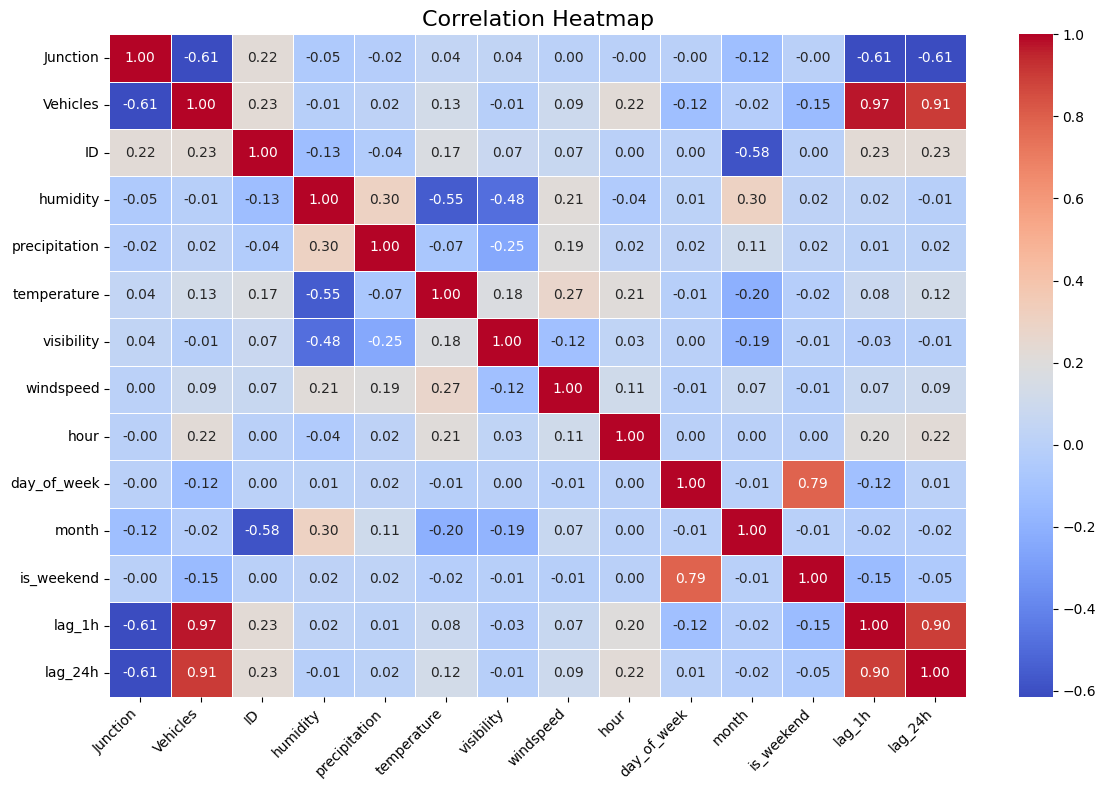

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = merged_df.corr(numeric_only=True)

# Set figure size and plot
plt.figure(figsize=(12, 8))  # Bigger size
sns.heatmap(corr,
            annot=True,       # Show values
            fmt=".2f",         # Format floats
            cmap="coolwarm",   # Color map
            linewidths=0.5,    # Grid lines
            linecolor='white',
            annot_kws={"size": 10})  # Font size

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
